In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
import matplotlib.pyplot as plt

base_dir = Path(".").absolute().parents[0]
import sys

if sys.path[0] != base_dir.as_posix():
    sys.path = [base_dir.as_posix()] + sys.path

In [2]:
from spatio_temporal.config import Config
from spatio_temporal.training.trainer import Trainer
from spatio_temporal.training.tester import Tester
from tests.utils import (
    create_linear_ds,
    _test_sklearn_model,
    get_pollution_data_beijing,
)
from spatio_temporal.training.eval_utils import _plot_loss_curves, save_losses

# Load in Data

In [3]:
ds = create_linear_ds()
ds

<xarray.Dataset>
Dimensions:  (lat: 10, lon: 10, time: 252)
Coordinates:
  * lat      (lat) float64 -55.15 -40.69 -26.22 -11.76 ... 46.1 60.56 75.02
  * lon      (lon) float64 -180.0 -140.0 -100.0 -60.0 ... 60.0 100.0 140.0 180.0
  * time     (time) datetime64[ns] 2000-01-31 2000-02-29 ... 2020-12-31
Data variables:
    feature  (lat, lon, time) float64 68.0 52.0 91.0 14.0 ... 20.0 1.0 71.0 nan
    target   (lat, lon, time) float64 140.0 238.0 182.0 318.5 ... 70.0 3.5 248.5

# Load in Config File

In [4]:
cfg = Config(base_dir / "configs/test_config.yml")
cfg.n_epochs

2

# Create Trainer

In [5]:
trainer = Trainer(cfg, ds)

Loading Data: 100%|██████████| 100/100 [00:00<00:00, 672.02it/s]


In [6]:
len(trainer.train_dl)
trainer.train_dl.batch_size

30

In [7]:
losses = trainer.train_and_validate()

Training Epoch 2:   0%|          | 0/514 [00:00<?, ?it/s]

Train Loss: 0.03
Valid Loss: 0.02


Validation Epoch 2: 100%|██████████| 114/114 [00:01<00:00, 81.67it/s]

Train Loss: 0.01
Valid Loss: 0.01


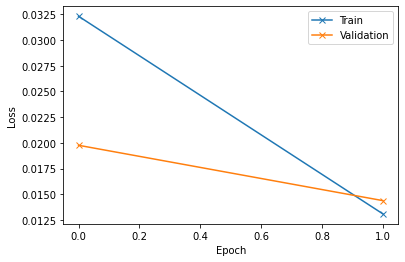

In [8]:
train_losses, valid_losses = losses
f, ax = plt.subplots()
ax.plot(train_losses, label="Train", color="C0", marker="x")
ax.plot(valid_losses, label="Validation", color="C1", marker="x")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.legend()

# Load the trained data

In [9]:
tester = Tester(cfg, ds)

Loading Data: 100%|██████████| 100/100 [00:00<00:00, 556.53it/s]


Test set Forward Pass: 100%|██████████| 194/194 [00:01<00:00, 125.72it/s]


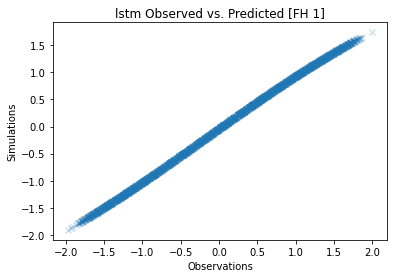

In [10]:
tester.run_test()

# The output forecasts! 

In [14]:
xr_path = sorted(list(cfg.run_dir.glob("*.nc")))[-1]
ds = xr.open_dataset(xr_path)
ds

<xarray.Dataset>
Dimensions:  (horizon: 1, pixel: 100, time: 58)
Coordinates:
  * time     (time) datetime64[ns] 2016-03-30T23:58:53.302898688 ... 2020-12-...
  * horizon  (horizon) int64 1
  * pixel    (pixel) object '-11.760000000000005_-100.0' ... '75.024_60.0'
Data variables:
    sim      (time, horizon, pixel) float32 ...
    obs      (time, horizon, pixel) float32 ...